In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
# Read the dataset
data = pd.read_csv("/content/btcNewsToPrice.csv")

In [6]:
print("Number of samples in the dataset:", data.shape[0])

Number of samples in the dataset: 2169


In [7]:
print(data.head())

       date                                              top_0  \
0  7/1/2015  Australia Plays Centralized Role in Banning Mo...   
1  7/2/2015  Digital Technology to Exponentially Disrupt Bu...   
2  7/3/2015         How Will Credit Work in a Bitcoin Economy?   
3  7/4/2015  Improper Network Block Validation Leads to Adv...   
4  7/5/2015  Bitcoin Documentaries Are Oudated, Time to Tak...   

                                               top_1 top_2 top_3 top_4 top_5  \
0                                                NaN   NaN   NaN   NaN   NaN   
1  Bitcoin Is A Better Way of Transferring Value ...   NaN   NaN   NaN   NaN   
2                                                NaN   NaN   NaN   NaN   NaN   
3  MasterCard Tests Facial Recognition Technology...   NaN   NaN   NaN   NaN   
4  Global Arena Holding, Inc to Acquire Blockchai...   NaN   NaN   NaN   NaN   

  top_6 top_7 top_8  ... top_13 top_14 top_15 top_16 top_17 top_18  price  \
0   NaN   NaN   NaN  ...    NaN    NaN    NaN

In [8]:
print(data.describe())

              price          open          high           low
count   2169.000000   2169.000000   2169.000000   2169.000000
mean    8703.441540   8687.204564   8953.196312   8387.575426
std    12154.712336  12142.205973  12544.055708  11667.853971
min      211.400000    211.400000    226.600000    196.300000
25%      829.200000    827.300000    874.700000    808.600000
50%     6389.100000   6386.600000   6513.100000   6255.900000
75%     9585.200000   9580.300000   9773.200000   9343.000000
max    63540.900000  63544.200000  64778.000000  62067.500000


In [9]:
# Convert non-numeric values to numeric
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(0, inplace=True)  # Filling any remaining NaN values after conversion

# Preprocess the data
# Here, you might want to perform additional preprocessing steps like scaling, etc.

# Split data into features and target variable
X = data.drop(columns=['price'])  # Features
y = data['price']  # Target variable

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Evaluate the model
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Feature Importance
feature_importance = rf_regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]



Training RMSE: 157.41646877147727
Testing RMSE: 365.6297089816435


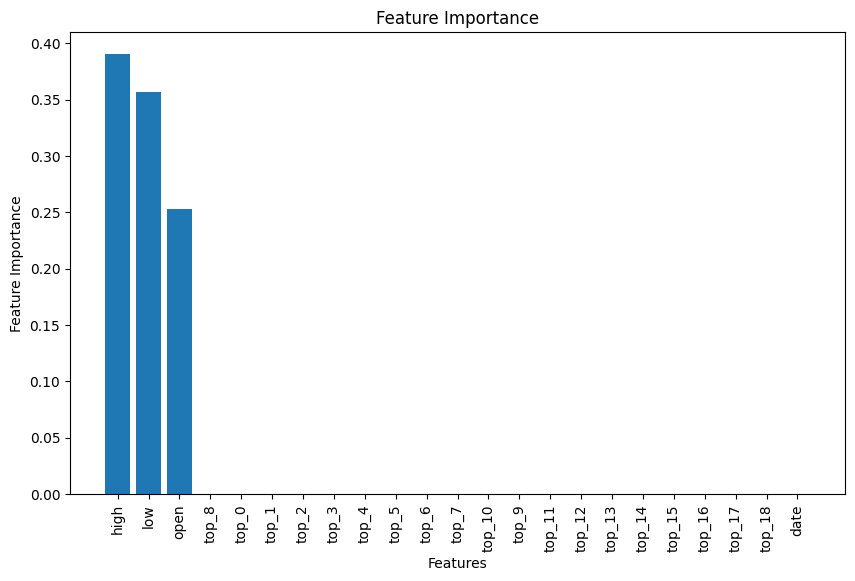

In [11]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

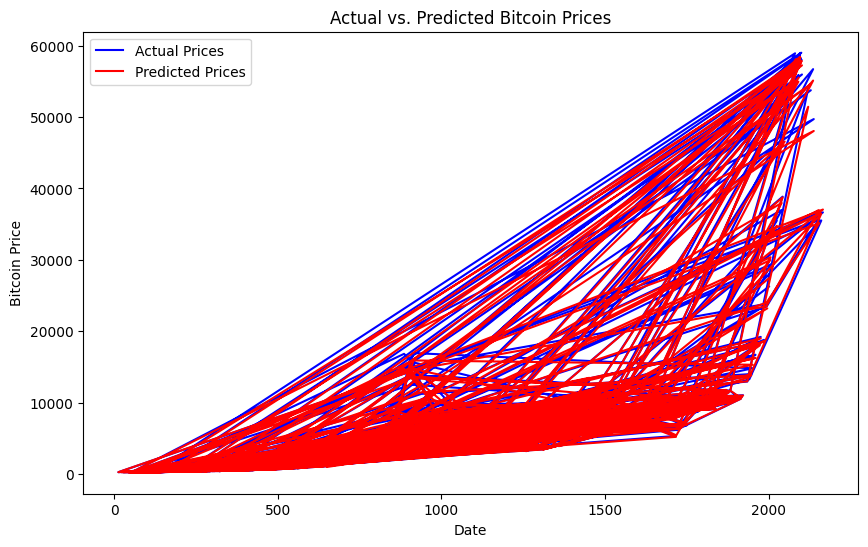

In [12]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Actual vs. Predicted Bitcoin Prices')
plt.legend()
plt.show()